In [1]:
import requests                  
import pandas as pd              
import numpy as np               
import matplotlib.pyplot as plt  
import time            
        
from tqdm import tqdm_notebook   
import vk
import pickle
import itertools

import plotly as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import joypy

import pymorphy2
from multiprocessing import Pool
import re
from nltk.corpus import stopwords
import nltk
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from collections import Counter
from wordcloud import WordCloud

In [2]:
%run ./func_vk.ipynb

In [3]:
token_array = [
    '6a94fe3b6a94fe3b6a94fe3b976ae7436466a946a94fe3b35db5e20d47ac92ded700a44',
    'fbf3fbe8fbf3fbe8fbf3fbe89efb87f4f8ffbf3fbf3fbe8a499b3d801ef141a992b7391',
    '6eb17bb024e3a42b1ec97de8579d9320b74e941c77a2bba03c4d3efcabec6b4be2dbc169c2508dd915c35',
    '8f3ea4f661075e6997cfd086dcb205b088d3572f149528dd324c62808c29efeaed417f1fb609537875c0a',
    '03422bf4ea5cdfbee7dc5492b2248ddaf47f223dacf7f44d784e1ea079c998f625cacf19a764016f04634',
    '52d77403c5382495f214257993f9a23a87d50a59bfc392cc2849ad8378b4ec4b3765feb8e8e9df333f7f4',
    '762262b8a8b87a93633ae3b0f335f9f85ca30a0a3c5317b0ea03aed50235f91b9f2384ea4c705aa969f23',
    'e668a57786a5df653c97b05ae3e9f8cdd513afd1f3d9acab2fa911418ea794c202b4b024fc85188876a63',
    '1f48f004eaf5f4e31d855bb27af9cd830ee71be9dbfdf3a6c2899d34af06ec281556ba40f2fb656551bff',
    '0e5d1a1c1f20410e4ff88df795e1393b2e4c82372d9e18764ea4f1f4cbf997b1cef2ed4a83a06c7b9df09'
]
    

session_array = [vk.Session(access_token=token) for token in token_array]
api_array = [vk.API(session, v='5.21') for session in session_array]

In [108]:
# token = '52d77403c5382495f214257993f9a23a87d50a59bfc392cc2849ad8378b4ec4b3765feb8e8e9df333f7f4'
# session = vk.Session(access_token=token)
# my_api = vk.API(session, v = '5.21')
# my_api.wall.get(owner_id = '-' + id_podari, count = 100, offset = str(200))['items']

Ура, оно работает, попытаемся сделать что-то полезное

Примерный план полезного у нас такой:

Давай начнём с какого нибудь вк. Действовать будем таким путём - обозначим какую нибудь тему за которой мы хотим мониторить - нууу например обучение (можно что угодно ещё)

Возьмём за основу какие нибудь группы популярные где такое есть - ну гик брейнс, можно шад, что нибудь такое. Будем парсить их посты через апишку и подписчиков. У подписьючиков будем искать ещё группы и смотреть потенциальные места и рассчирять список групп, у постов будем смотреть охватность и искать какие нибудь маркерные слова что это рекламный пост (ну или явную запись что пост рекламный), сверять охватности

Вот собственно план на начало)

Потом между постами будем искать модельки близости


https://vk.com/geekbrainsru - первая цель. Украдём посты и подписичников

In [309]:
id_geek = '15365973'
id_volley = '65570928'
id_podari = '6803013'
id_vol_2 = '197868296'

Интересно, с одним токеном стена парсится 5 +/- секунд, с 4 токенами 2.5 +/- секунд. В 4 раза больше токенов, но прирост по скорости только в 2 раза... Кажется время в слипе можно еще порезать...  

ПОСЛЕ КАКОГО-ТО КОЛИЧЕСТВА времени и проведенных експериментов оказалось, что у меня настолько жопорукий код, что строку с time.sleep() вообще можно закомментить... и стена прекрасно парсится 😅😅😅 иии не надо никакой сотни токенов

Посмотрим, будет ли от этого толк в других функциях

Отлично, мы умеем получать текст и id постов из рандомных групп. Теперь поучимся считать охват.

Вот теперь отлично! Все выглядит так, будто мы большие молодцы. Очевиден прирост в скорости, надо еще раздобыть токенов и станет совсем хорошо. (докинул еще токенов)

Теперь у нас есть такая красота. По столбцам у нас:

- пост
- id поста
- id пользователей, оставивших комментарий
- id пользователей, оставивших лайк под постом
- id пользователей, оставивших лайк под комментариями

на основе этого можно уже придумывать какие-то модели, пихать в word2vec, ну и на что фантазии хватит. Хотя фьючей хотелось бы, наверное, побольше)

# Начинаем парсить БФ

In [317]:
%%time
df_rusfond = parser(group_id='43661934', api_array=api_array)

В группе  4826 постов



В группе  12824 комментариев


smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w


CPU times: user 6min 2s, sys: 21.4 s, total: 6min 24s
Wall time: 55min 47s


In [319]:
save_df(df = df_rusfond, name = 'rusfond')

In [320]:
%%time
df_line = parser(group_id='12888908', api_array=api_array)

В группе  3632 постов



В группе  2208 комментариев


smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w


CPU times: user 2min 48s, sys: 9.61 s, total: 2min 58s
Wall time: 25min 42s


In [321]:
save_df(df = df_line, name = 'line')

In [322]:
%%time
df_anton = parser(group_id='62672621', api_array=api_array)

В группе  3442 постов



В группе  4574 комментариев


smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w


CPU times: user 3min 8s, sys: 10.8 s, total: 3min 19s
Wall time: 31min 36s


In [323]:
save_df(df = df_anton, name = 'anton')

In [4]:
%%time
df_habensk = parser(group_id='49095389', api_array=api_array)
save_df(df = df_habensk, name = 'habensk')

В группе  1590 постов



В группе  4080 комментариев



CPU times: user 2min 16s, sys: 6.73 s, total: 2min 23s
Wall time: 21min 7s


In [5]:
%%time
df_starost = parser(group_id='4419125', api_array=api_array)
save_df(df = df_starost, name = 'starost')

В группе  9840 постов



В группе  20999 комментариев


smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w


CPU times: user 11min 7s, sys: 38.4 s, total: 11min 45s
Wall time: 1h 42min 49s


In [4]:
%%time
df_sheredar = parser(group_id='49301697', api_array=api_array)
save_df(df = df_sheredar, name = 'sheredar')

В группе  4303 постов



В группе  2562 комментариев



CPU times: user 3min 31s, sys: 11.2 s, total: 3min 42s
Wall time: 32min 39s


In [5]:
%%time
df_miloserdie = parser(group_id='121066771', api_array=api_array)
save_df(df = df_miloserdie, name = 'miloserdie')

В группе  3314 постов



В группе  1862 комментариев



CPU times: user 2min 40s, sys: 8.42 s, total: 2min 48s
Wall time: 24min 8s


In [6]:
%%time
df_alesha = parser(group_id='5478500', api_array=api_array)
save_df(df = df_alesha, name = 'alesha')

В группе  5676 постов



В группе  57913 комментариев


smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w


CPU times: user 15min 9s, sys: 51.9 s, total: 16min 1s
Wall time: 2h 39min


In [7]:
%%time
df_detizhdut = parser(group_id='39873171', api_array=api_array)
save_df(df = df_detizhdut, name = 'detizhdut')

В группе  8505 постов



В группе  42134 комментариев


smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w


CPU times: user 14min 38s, sys: 51 s, total: 15min 29s
Wall time: 2h 20min 20s


In [8]:
%%time
df_malish = parser(group_id='37437056', api_array=api_array)
save_df(df = df_malish, name = 'malish')

В группе  6406 постов



В группе  5143 комментариев


smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w


CPU times: user 5min 20s, sys: 18.3 s, total: 5min 38s
Wall time: 47min 48s


In [9]:
%%time
df_vita = parser(group_id='56176996', api_array=api_array)
save_df(df = df_vita, name = 'vita')

В группе  12721 постов



В группе  8637 комментариев


smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w


CPU times: user 10min 13s, sys: 35.2 s, total: 10min 49s
Wall time: 1h 32min 41s


In [10]:
%%time
df_legko = parser(group_id='73225212', api_array=api_array)
save_df(df = df_legko, name = 'legko')

В группе  5669 постов



В группе  123844 комментариев


smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w

smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going wrong!!
smth going w


CPU times: user 29min 53s, sys: 1min 46s, total: 31min 39s
Wall time: 4h 46min 36s


# Аналитика

давай наваявать простой аналитики поверх:
- найдем посты которые явно выбиваются. для этого можно использовать временные ряды (ну почти). типа количество лайков на каждом посте по оси игрек, по оси иксов просто таймлайн условно. тогда используя оценку доверительного интервала со скользящим окном ты найдешь посты которые по лайкам оказываются аномалиями
- давай бахнем тф-идф по текстам и найдем слова которые влекут потенциально к наибольшей залайканности
- бахнем кластеризацию/что ниьудь такое чтобы повизхуализировать данные
- можно еще краисвое облако тегов. бесполезно, но красиво

In [12]:
df_post = open_df('vk_df_legko')

df_post.head()

text      id        date  \
0  💜 ЛОТЕРЕЯ ДОБРА продолжается...\n\nПоддержите ...  164310  1605189141   
1  ‼️ Поддержите сбор Лерочки! У малышки ДЦП. Но ...  164723  1605373800   
2  ‼️ Только с вашей помощью Демид сможет победит...  164707  1605367500   
3  ❤️ 30 000 рублей подопечным фонда «Помогать ле...  164678  1605357900   
4  ❤️ Спасибо от семьи Гоптенко!\n\nЕще одно виде...  164661  1605350100   

                              user_id_comment  \
0            [19888490, -73225212, -73225212]   
1                                 [278242667]   
2           [545718129, 118586780, 219472842]   
3  [341401625, 312460156, 589524542, 7335126]   
4                                          []   

                                        user_id_like  \
0  [221708889, 67773611, 16048819, 265359050, 422...   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   

                                     like_comment_id  
0                                        [318484585]  
1                                                NaN  
2                                                NaN  
3  [219472842, 312460156, 312460156, 219472842, 2...  
4                                                NaN

In [13]:
# df_post['date'] = df_post['date'].apply(lambda x: pd.to_datetime(x, unit = 's'))
# df_post['year'] = df_post['date'].apply(lambda x: x.year)
# df_post

In [14]:
# df_post = df_post[df_post['year'] == 2019]

user_id_comment --> like_comment - люди, оставившие комментарий под постом

user_id_like --> like_post - люди, оставившие лайк под постом

like_comment_id --> like_comment_comment - люди, оставившие лайк под комментарием поста

In [15]:
df_post['like_comment_id'].fillna(value=0, inplace = True)
df_post['user_id_comment'].fillna(value=0, inplace = True)
df_post['user_id_like'].fillna(value=0, inplace = True)
df_post['like_comment_id'] = df_post['like_comment_id'].apply(lambda x: fillna_with_arr(x))
df_post['user_id_comment'] = df_post['user_id_comment'].apply(lambda x: fillna_with_arr(x))
df_post['user_id_like'] = df_post['user_id_like'].apply(lambda x: fillna_with_arr(x))
df_post['date'] = df_post['date'].apply(lambda x: pd.to_datetime(x, unit = 's'))
df_post['like'] = (
    
    df_post['user_id_comment'].apply(lambda x: len(x)) 
    + df_post['user_id_like'].apply(lambda x: len(x)) 
    + df_post['like_comment_id'].apply(lambda x: len(x))
)

df_post['like_comment'] = df_post['user_id_comment'].apply(lambda x: len(x))
df_post['like_post'] = df_post['user_id_like'].apply(lambda x: len(x))
df_post['like_comment_comment'] = df_post['like_comment_id'].apply(lambda x: len(x))
df_post.head()

text      id  \
0  💜 ЛОТЕРЕЯ ДОБРА продолжается...\n\nПоддержите ...  164310   
1  ‼️ Поддержите сбор Лерочки! У малышки ДЦП. Но ...  164723   
2  ‼️ Только с вашей помощью Демид сможет победит...  164707   
3  ❤️ 30 000 рублей подопечным фонда «Помогать ле...  164678   
4  ❤️ Спасибо от семьи Гоптенко!\n\nЕще одно виде...  164661   

                 date                             user_id_comment  \
0 2020-11-12 13:52:21            [19888490, -73225212, -73225212]   
1 2020-11-14 17:10:00                                 [278242667]   
2 2020-11-14 15:25:00           [545718129, 118586780, 219472842]   
3 2020-11-14 12:45:00  [341401625, 312460156, 589524542, 7335126]   
4 2020-11-14 10:35:00                                          []   

                                        user_id_like  \
0  [221708889, 67773611, 16048819, 265359050, 422...   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   

                                     like_comment_id  like  like_comment  \
0                                        [318484585]   150             3   
1                                                 []     1             1   
2                                                 []     3             3   
3  [219472842, 312460156, 312460156, 219472842, 2...     9             4   
4                                                 []     0             0   

   like_post  like_comment_comment  
0        146                     1  
1          0                     0  
2          0                     0  
3          0                     5  
4          0                     0

In [16]:
df_post['like'].describe()

count     5669.000000
mean       169.817428
std        729.252794
min          0.000000
25%          5.000000
50%         19.000000
75%         79.000000
max      47322.000000
Name: like, dtype: float64

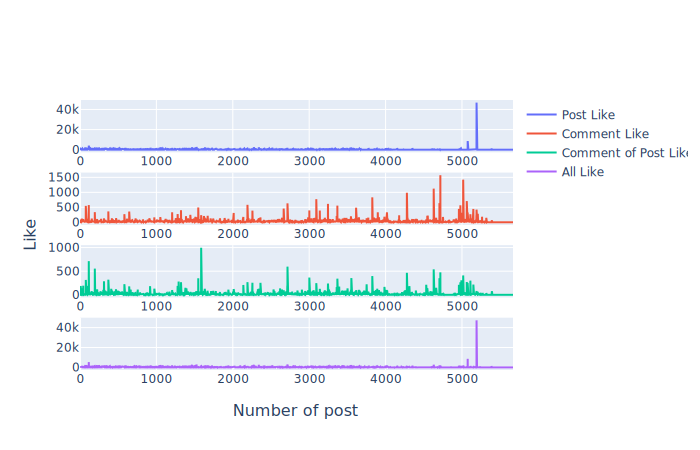

In [22]:
plot_Like(df = df_post, type_plot='svg')

## 1. Moving Average

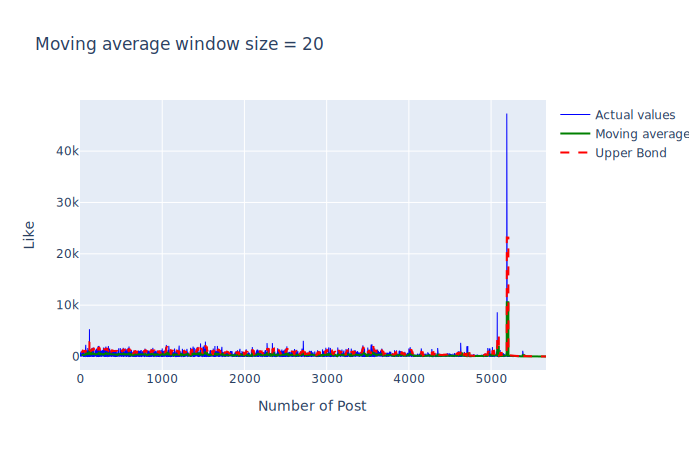

In [25]:
plotMovingAverage_plotly(df_index=df_post.index, 
                         series=df_post['like'], 
                         n = 20, 
                         type_plot='svg')

## 2. Делаем всякие штуки с текстом 

Невероятно, но факт, мы тут работаем с текстом. А это значит, что перед тем, как делать всякие штуки с текстом, его надо токенизировать, лемматизировать, убрать стоп-слова, ну, вот это вот всё. Погнали. (Хорошо, что я делал домашки по NLP и они у меня остались в закромах xD)

In [26]:
clean_df(df_post)

df_post['lemmas_text'].head()

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



0    лотерея добро продолжаться поддержать подопечн...
1    поддержать сбор лерочки у малышок дцп но такой...
2    только ваш помощь демид смочь победить рак пом...
3    рубль подопечный фонд помогать легко хороший н...
4    спасибо семья гоптенко ещё один видеописьмо сл...
Name: lemmas_text, dtype: object

In [27]:
vec_tf_idf = TfidfVectorizer(ngram_range=(1,1), stop_words = noise)
tf_idf_text = vec_tf_idf.fit_transform(df_post['lemmas_text'])

# print(tf_idf_text[0])

In [28]:
np.percentile(df_post['like'], 90)

600.1999999999998

Будем считать, что все, что больше 12 лайков, это то, что нам нужно

In [29]:
df_post['target'] = df_post['like'].apply(lambda x: 1 if x > (np.percentile(df_post['like'], 90)) else 0)

In [30]:
tmp = vec_tf_idf.fit_transform(df_post['lemmas_text'])

Тут, короче, в чем у меня была идея. На нашем тф-идфе обучить что-нибудь простое, что можно интерпретировать (LogisticRegression). Она агрится на элементы массива большими коэффициентами - это ключевые слова, которые нам нужны. Вытаскиваем топ коэффициентов --> получаем топ слов из тф-идфа.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(tmp, df_post['target'], test_size=0.2)

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

cross_val_score(clf, tmp, df_post['target'], cv = 5).mean()

0.8867548967872594

In [32]:
np.percentile(clf.coef_, 95)

0.16189056374704047

In [33]:
# тут хороший вопрос, брать модуль или нам нужны только положительные коэффициенты?

# clf.coef_[abs(clf.coef_) > np.percentile(clf.coef_, 95)]
clf.coef_[(clf.coef_) > np.percentile(clf.coef_, 90)][:10]

array([0.62138361, 0.16694518, 0.56176318, 0.32754214, 0.10151225,
       0.59902226, 0.5557756 , 0.33790237, 0.19936277, 0.13265406])

In [34]:
index_ar = np.array((abs(clf.coef_) > np.percentile(clf.coef_, 90))[0])
# index_ar = np.array(((clf.coef_) > np.percentile(clf.coef_, 95))[0])
vec_ar = np.array(vec_tf_idf.get_feature_names())
top_words = vec_ar[index_ar]

In [35]:
[(word) for word in top_words][:5]

['абдурахман', 'абрамов', 'абсолютно', 'август', 'аветисян']

In [36]:
count_top_log_coef = count_like_top(df = df_post, arr = top_words)

In [37]:
count_top_log_coef.most_common(10)

[('ступор', 12165.5),
 ('мольба', 5066.1),
 ('погибать', 4106.692307692308),
 ('опухолевый', 3892.923076923077),
 ('отчитывать', 3776.25),
 ('северанс', 3372.866666666667),
 ('разгар', 3241.3333333333335),
 ('поломка', 3192.9333333333334),
 ('искоренить', 2897.0),
 ('равнодушно', 2435.0)]

## 3. Как-нибудь визуализируем данные

Ну, я даже не знаю, можно пихнуть в PCA, разложить на 2 компоненты, посмотреть, что получится. Еще tSNE попробовать можно

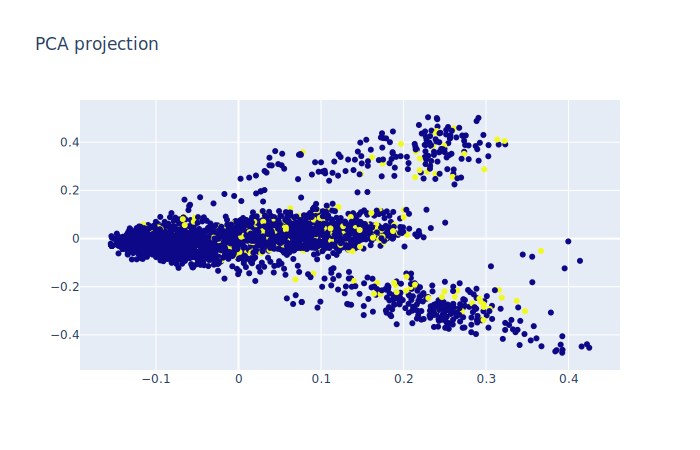

CPU times: user 26.7 s, sys: 1.82 s, total: 28.5 s
Wall time: 7.84 s


In [38]:
%%time

pca = PCA(n_components=2)
tf_idf_text_reduced = pca.fit_transform(tf_idf_text.toarray())

plot_reduce_viz(x = tf_idf_text_reduced[:, 0], 
                y = tf_idf_text_reduced[:, 1], 
                color_marker = df_post['target'], 
                text=df_post['text'], 
                title = 'PCA projection', 
                type_plot = 'svg')

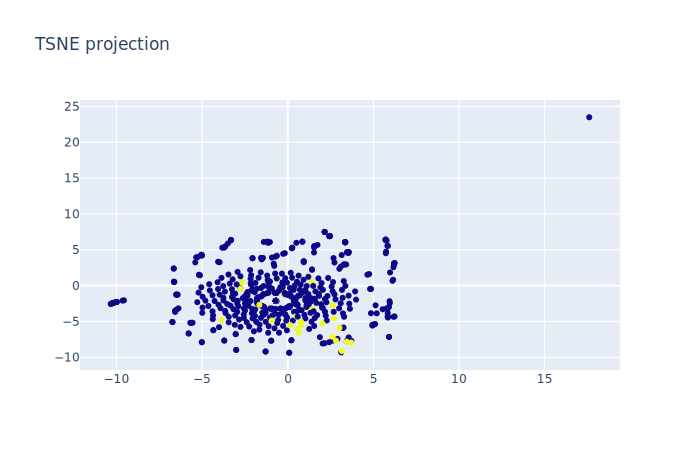

CPU times: user 4.87 s, sys: 3.08 ms, total: 4.88 s
Wall time: 4.94 s


In [39]:
%%time

tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(tf_idf_text.toarray())

plot_reduce_viz(x = X_tsne[:, 0], 
                y = X_tsne[:, 1], 
                color_marker = df_post['target'], 
                text=df_post['text'],
                title = 'TSNE projection'
               )

## 4. Ещё что-нибудь бесполезное, но красивое

Попробуем облако слов


In [39]:
df_post['counter'] = df_post['lemmas_text'].apply(clean_noise)
df_post['counter'] = df_post['counter'].apply(count_word)
full_counter = df_post['counter'].sum()

In [40]:
# самые популярные слова
full_counter.most_common(10)

[('помочь', 7661),
 ('ребёнок', 7268),
 ('наш', 7064),
 ('это', 5802),
 ('мама', 5364),
 ('пожертвование', 5233),
 ('очень', 5139),
 ('год', 4658),
 ('помогать', 4480),
 ('лечение', 4235)]

In [41]:
# берем все слова, в "топовых постах" и считаем их количество
like_counter = df_post[(df_post['target'] == 1)]['counter'].sum()

In [42]:
# считаем среднее количество лайков в постах с каждым "топовым" словами
counter_like = count_like(df = df_post, like_counter = like_counter)

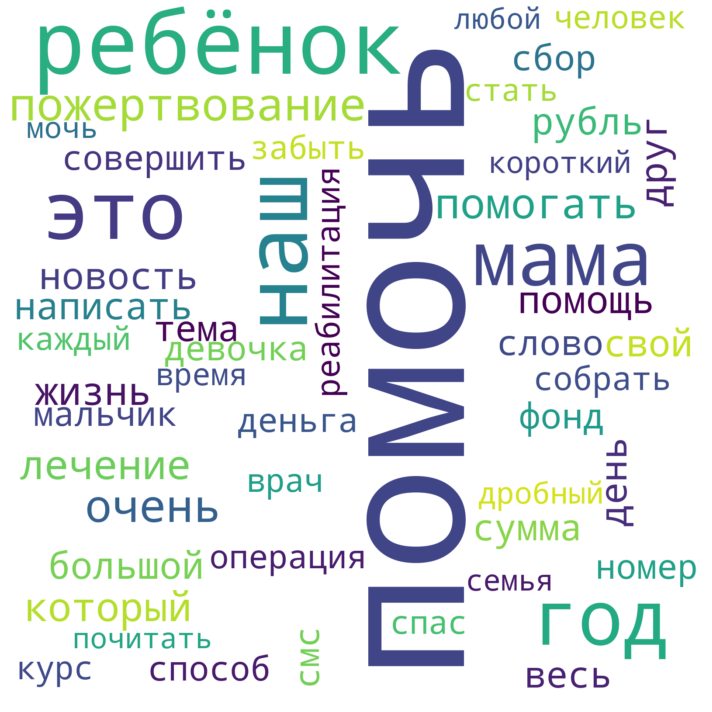

In [32]:
# самые популярные слова
cloud_word(full_counter, 50)

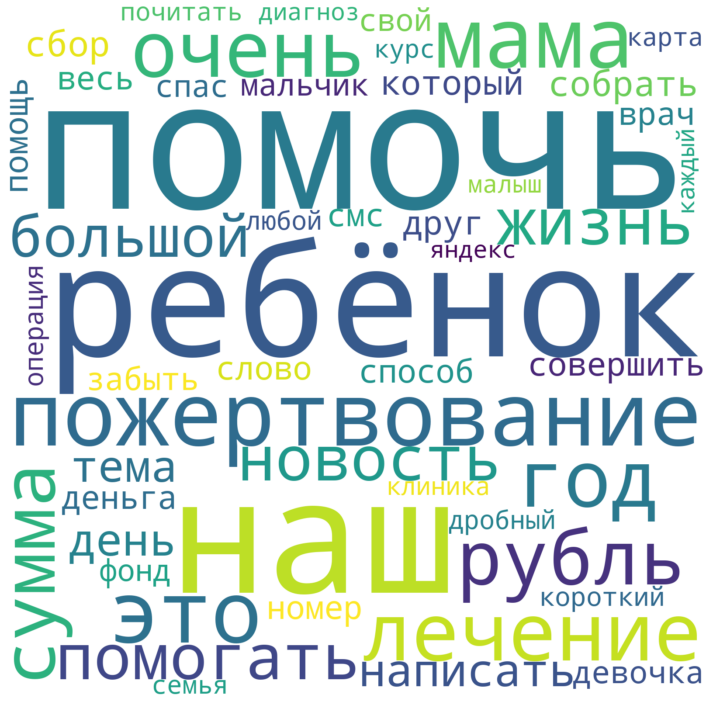

In [33]:
# берем все слова, в "топовых постах" и считаем их количество
cloud_word(like_counter, 50)

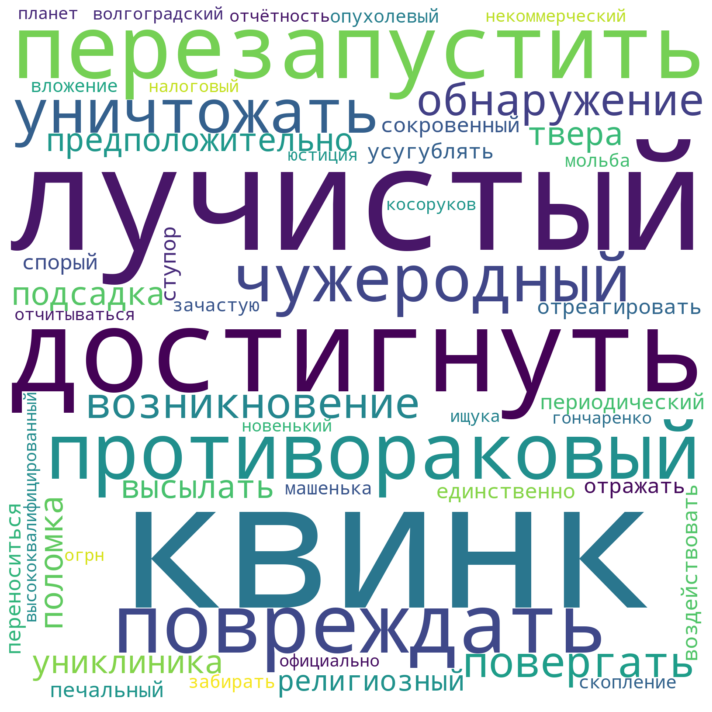

In [34]:
# среднее количество лайков в "топовых" постах  
cloud_word(counter_like, 50)

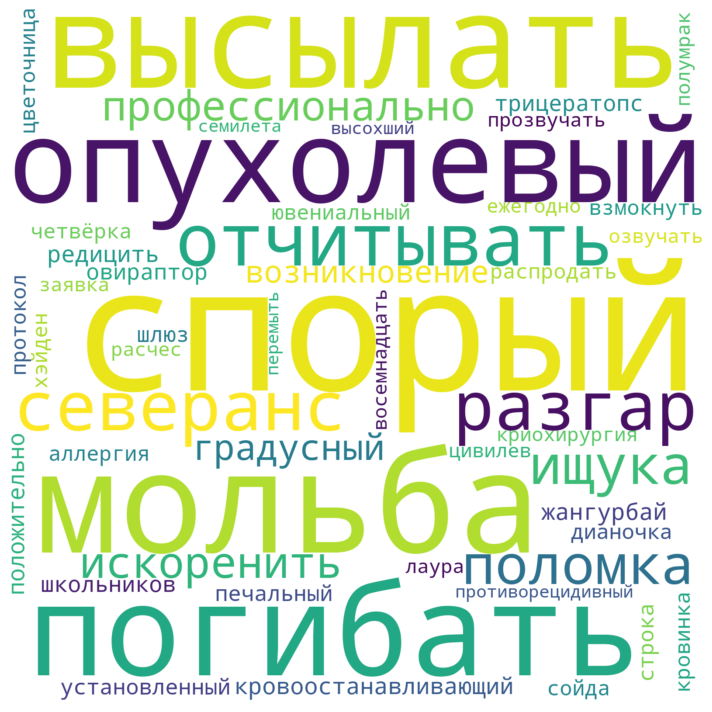

In [35]:
# топовые слова по мнению логистической регрессии
cloud_word(count_top_log_coef, 50)

In [43]:
full_text_lemm = df_post['lemmas_text'].str.cat(sep = ' ')

In [46]:
# fdict = nltk.FreqDist()
fdict = nltk.FreqDist(word for word in nltk.word_tokenize(full_text_lemm) if word not in noise)    

Берем самые залайканные посты, слова в посте = количество лайков, суммируем лайки по всем постам, делим на количество постов с этим словом, рисуем картинку

In [47]:
len(df_post[(df_post['target'] == 1)])

567

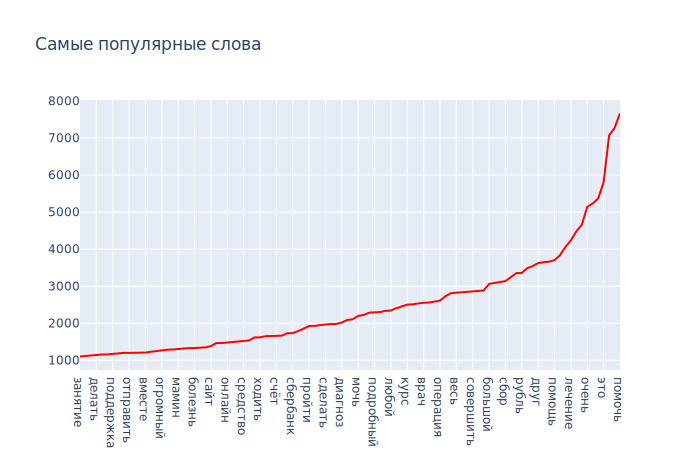

In [52]:
x_like, y_like = trace_count(full_counter, 100)

x_like = rev_arr(x_like)
y_like = rev_arr(y_like)

plot_counter(x = x_like, y = y_like, title='Самые популярные слова', type_plot = 'svg')

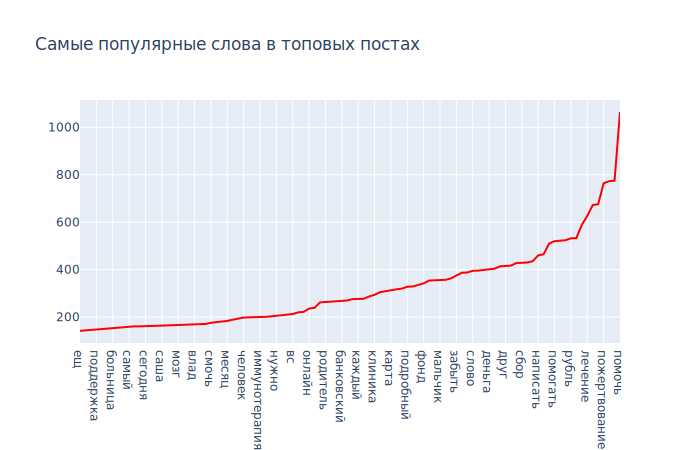

In [54]:
x_like, y_like = trace_count(like_counter, 100)

x_like = rev_arr(x_like)
y_like = rev_arr(y_like)

plot_counter(x = x_like, y = y_like, title='Самые популярные слова в топовых постах', type_plot='svg')

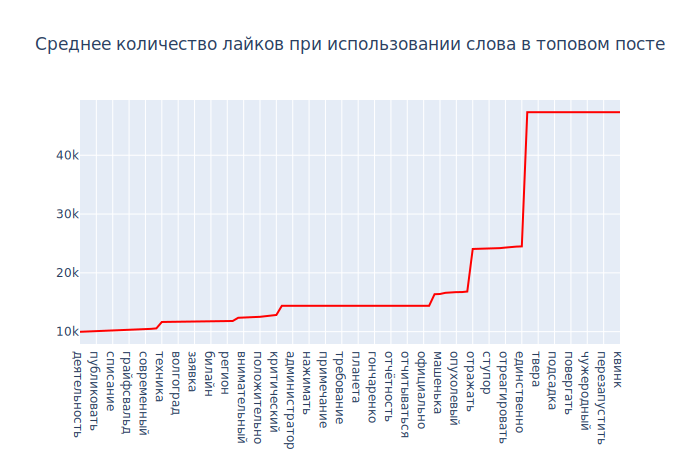

In [55]:
x_like, y_like = trace_count(counter_like, 100)

x_like = rev_arr(x_like)
y_like = rev_arr(y_like)

plot_counter(x = x_like, y = y_like, title='Среднее количество лайков при использовании слова в топовом посте',
            type_plot= 'svg')

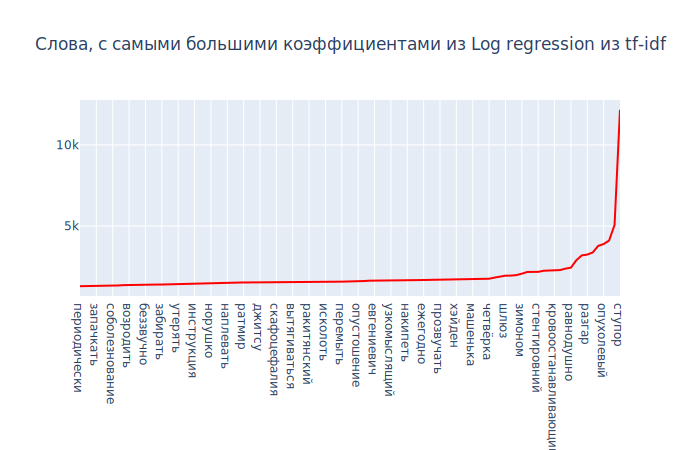

In [56]:
x_like, y_like = trace_count(count_top_log_coef, 100)

x_like = rev_arr(x_like)
y_like = rev_arr(y_like)

plot_counter(x = x_like, y = y_like, title='Слова, c самыми большими коэффициентами из Log regression из tf-idf',
            type_plot='svg')


## 5. Пробуем прикрутить таймлайны

In [57]:
df_post.head()

text      id  \
0  💜 ЛОТЕРЕЯ ДОБРА продолжается...\n\nПоддержите ...  164310   
1  ‼️ Поддержите сбор Лерочки! У малышки ДЦП. Но ...  164723   
2  ‼️ Только с вашей помощью Демид сможет победит...  164707   
3  ❤️ 30 000 рублей подопечным фонда «Помогать ле...  164678   
4  ❤️ Спасибо от семьи Гоптенко!\n\nЕще одно виде...  164661   

                 date                             user_id_comment  \
0 2020-11-12 13:52:21            [19888490, -73225212, -73225212]   
1 2020-11-14 17:10:00                                 [278242667]   
2 2020-11-14 15:25:00           [545718129, 118586780, 219472842]   
3 2020-11-14 12:45:00  [341401625, 312460156, 589524542, 7335126]   
4 2020-11-14 10:35:00                                          []   

                                        user_id_like  \
0  [221708889, 67773611, 16048819, 265359050, 422...   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   

                                     like_comment_id  like  like_comment  \
0                                        [318484585]   150             3   
1                                                 []     1             1   
2                                                 []     3             3   
3  [219472842, 312460156, 312460156, 219472842, 2...     9             4   
4                                                 []     0             0   

   like_post  like_comment_comment  \
0        146                     1   
1          0                     0   
2          0                     0   
3          0                     5   
4          0                     0   

                                         lemmas_text  target  \
0  лотерея добро продолжаться поддержать подопечн...       0   
1  поддержать сбор лерочки у малышок дцп но такой...       0   
2  только ваш помощь демид смочь победить рак пом...       0   
3  рубль подопечный фонд помогать легко хороший н...       0   
4  спасибо семья гоптенко ещё один видеописьмо сл...       0   

                                             counter  
0  {'лотерея': 2, 'добро': 1, 'продолжаться': 1, ...  
1  {'поддержать': 2, 'сбор': 2, 'лерочки': 1, 'ма...  
2  {'ваш': 1, 'помощь': 3, 'демид': 7, 'смочь': 1...  
3  {'рубль': 1, 'подопечный': 2, 'фонд': 2, 'помо...  
4  {'спасибо': 4, 'семья': 1, 'гоптенко': 1, 'ещё...

In [58]:
counter_like.most_common(5)

[('квинк', 47322.0),
 ('лучистый', 47322.0),
 ('достигнуть', 47322.0),
 ('перезапустить', 47322.0),
 ('повреждать', 47322.0)]

<Figure size 2280x1520 with 0 Axes>

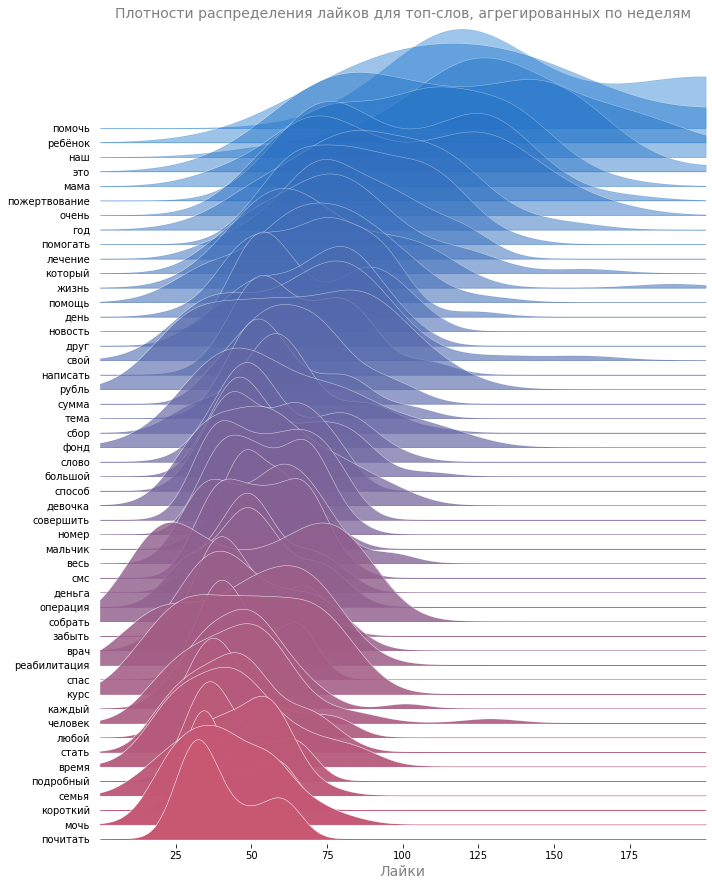

In [60]:
df_tmp = df_for_timeline(df_post, 'week', full_counter, 50)
columns_for_joy = [column for column in df_tmp.columns if column not in 'counter']
plot_word_dens(df_tmp, columns_for_joy, 200, 'неделям')

<Figure size 2280x1520 with 0 Axes>

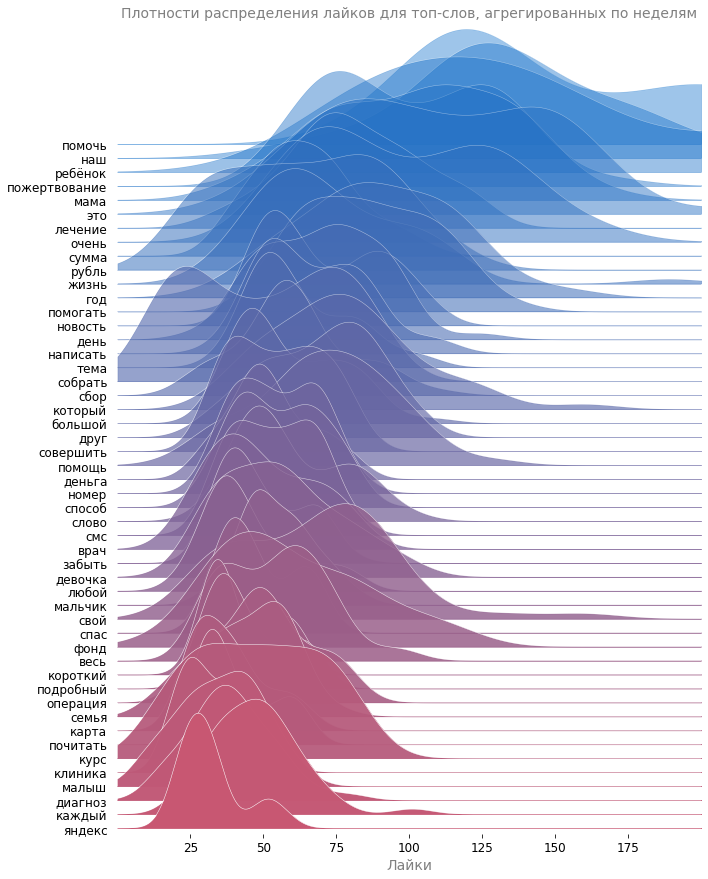

In [61]:
df_tmp = df_for_timeline(df_post, 'week', like_counter, 50)
columns_for_joy = [column for column in df_tmp.columns if column not in 'counter']
plot_word_dens(df_tmp, columns_for_joy, 200, 'неделям')

<Figure size 2280x1520 with 0 Axes>

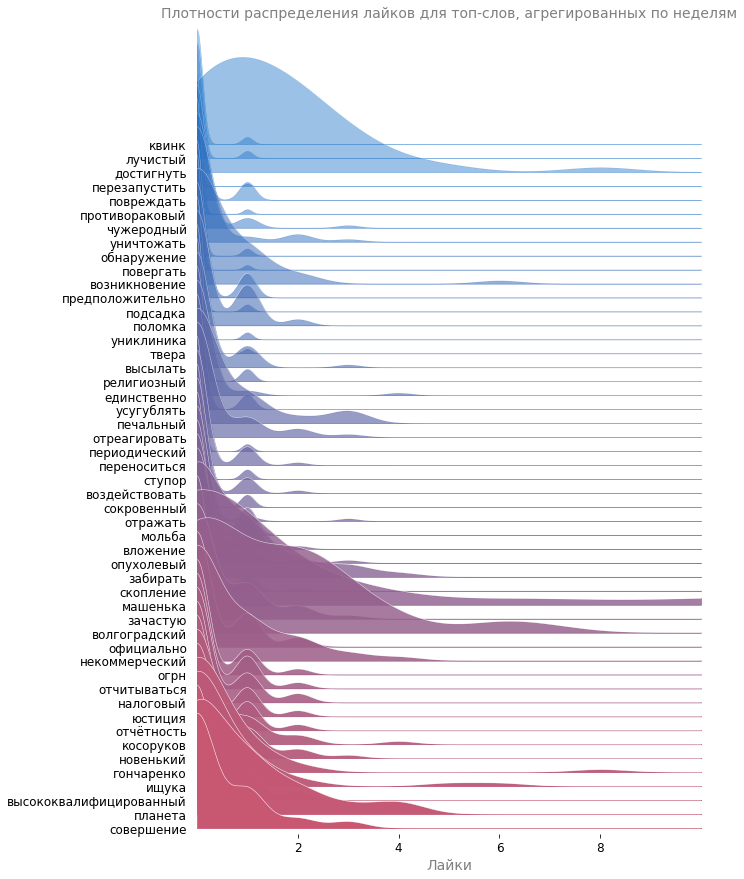

In [62]:
df_tmp = df_for_timeline(df_post, 'week', counter_like, 50)
columns_for_joy = [column for column in df_tmp.columns if column not in 'counter']
plot_word_dens(df_tmp, columns_for_joy, 10, 'неделям')

<Figure size 2280x1520 with 0 Axes>

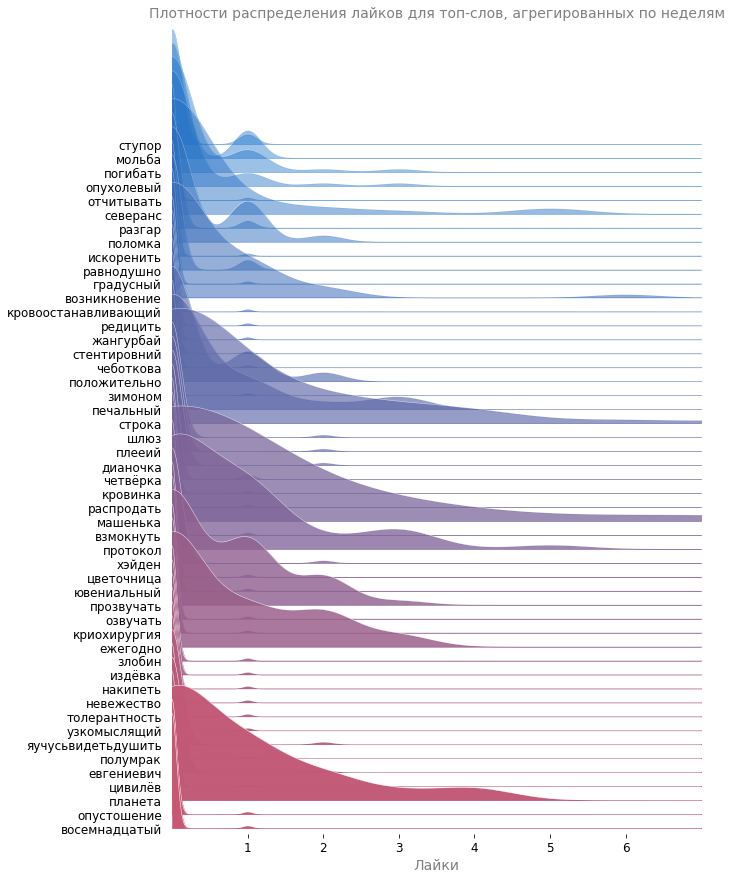

In [63]:
df_tmp = df_for_timeline(df_post, 'week', count_top_log_coef, 50)
columns_for_joy = [column for column in df_tmp.columns if column not in 'counter']
plot_word_dens(df_tmp, columns_for_joy, 7, 'неделям')

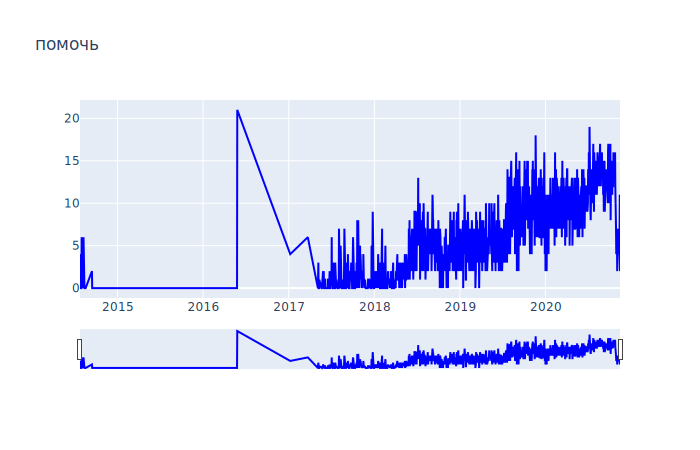

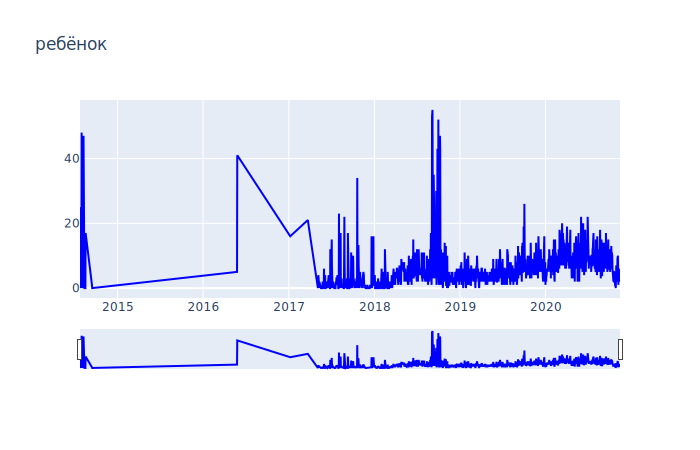

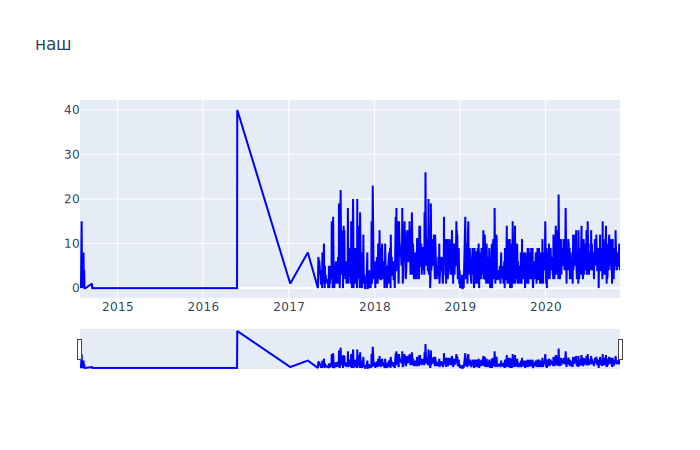

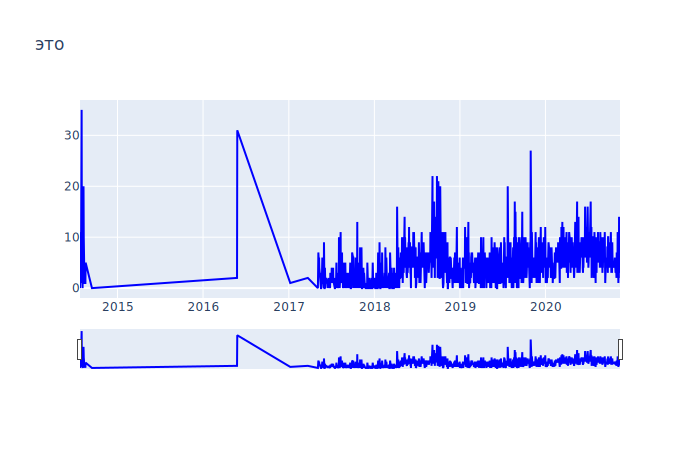

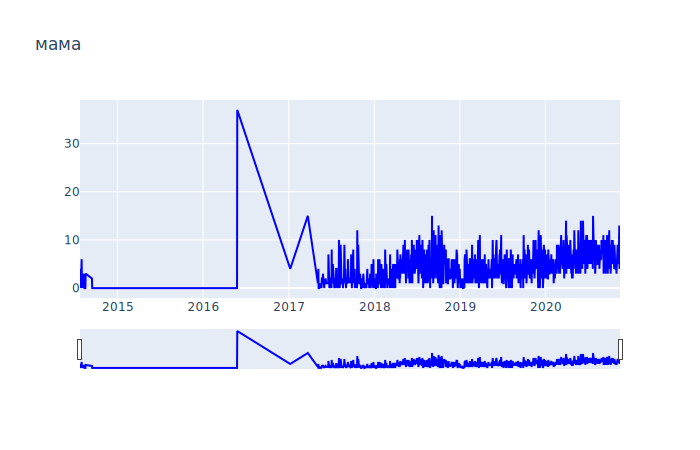

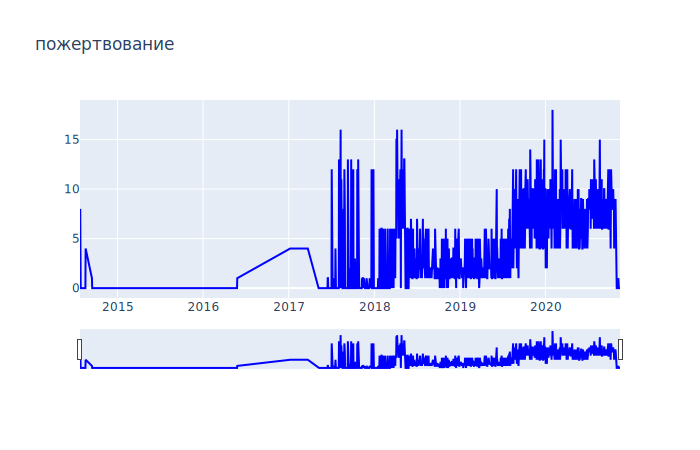

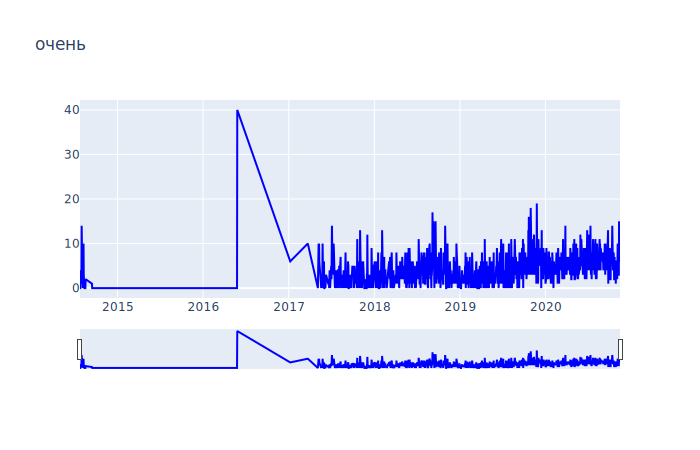

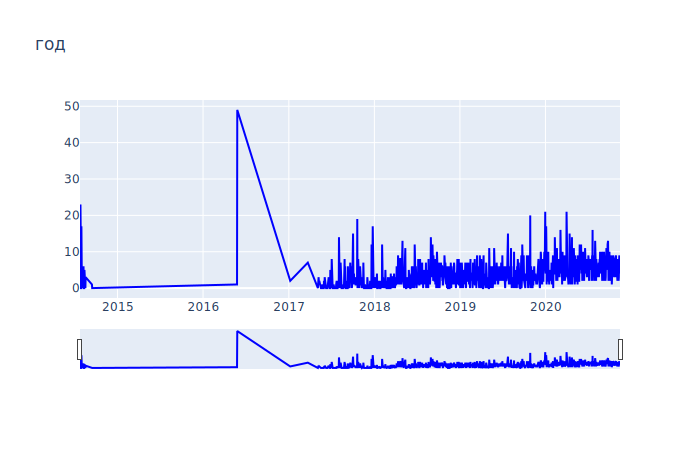

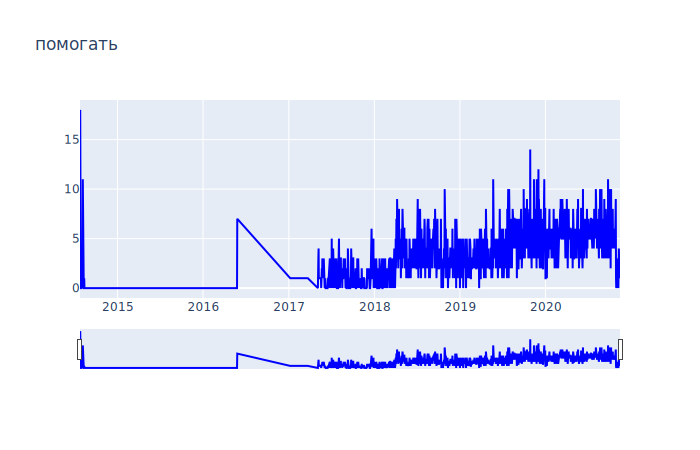

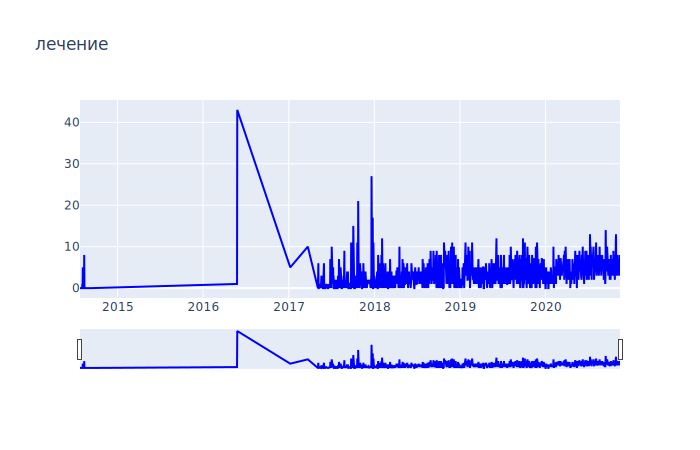

In [67]:
plot_separate_line(df_post, full_counter, 10, 1, 'svg')

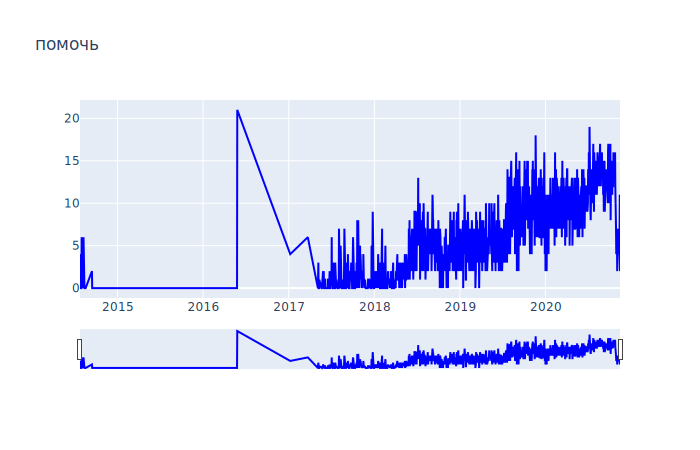

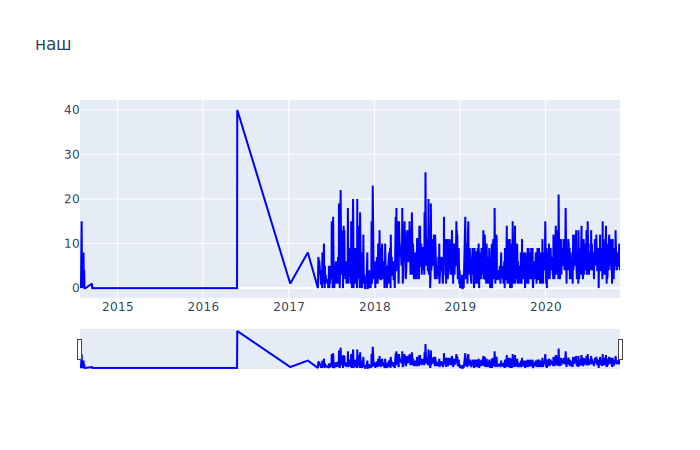

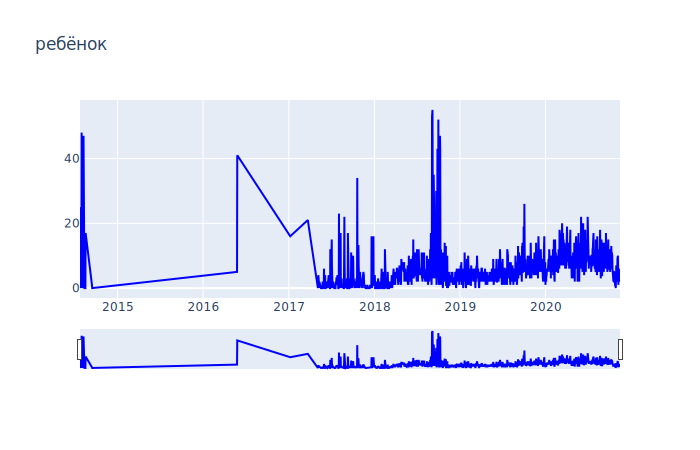

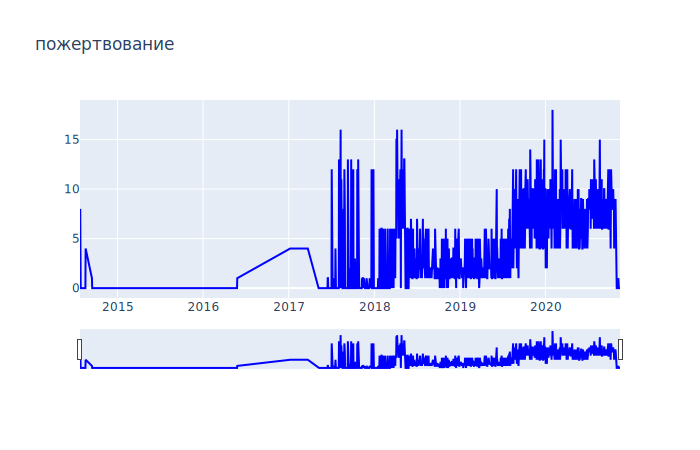

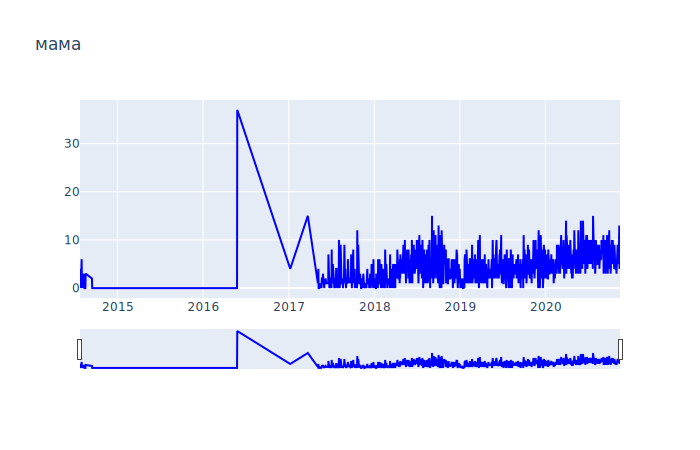

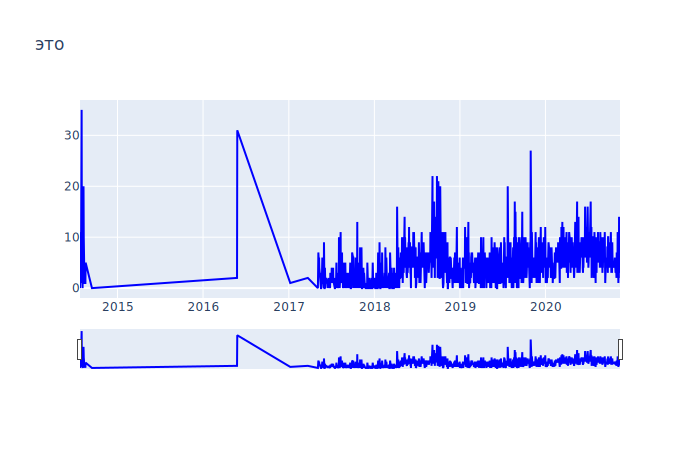

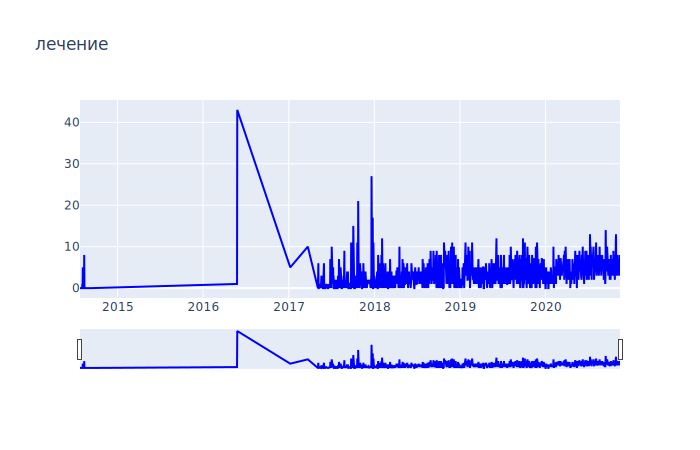

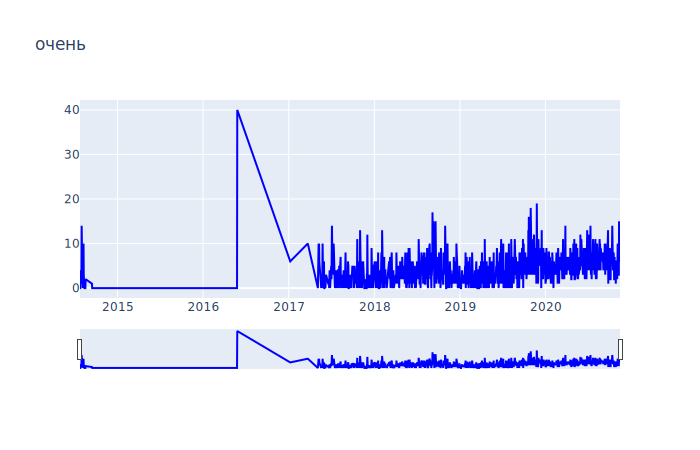

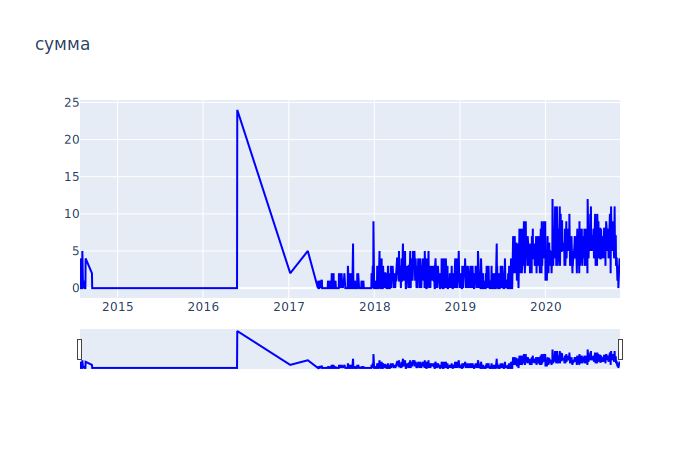

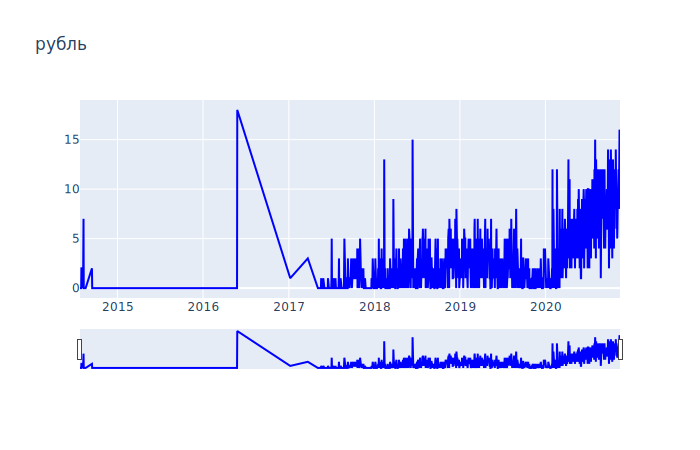

In [68]:
plot_separate_line(df_post, like_counter, 10, 1, 'svg')

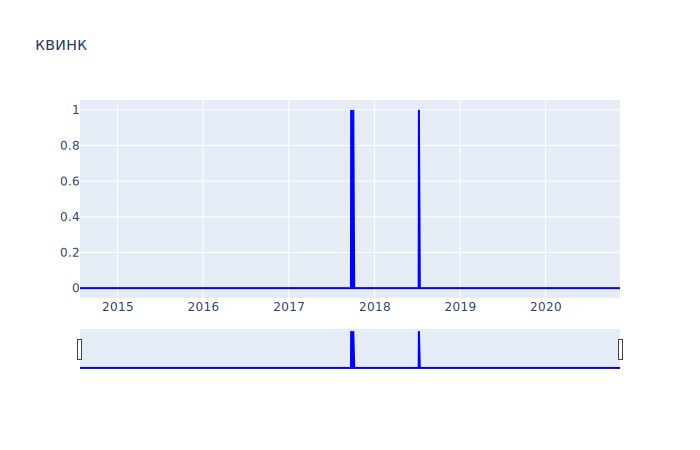

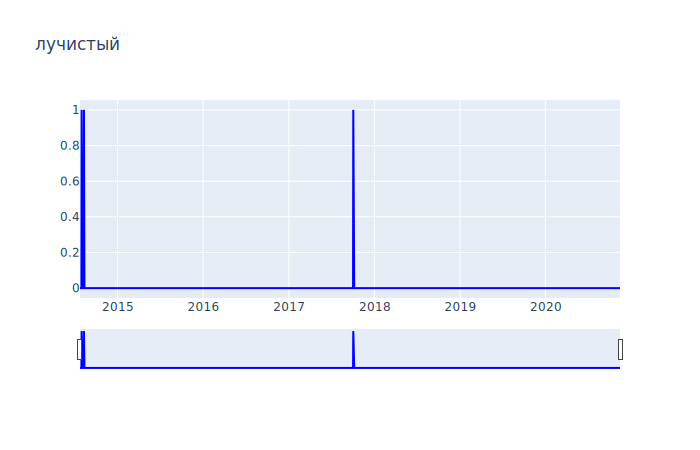

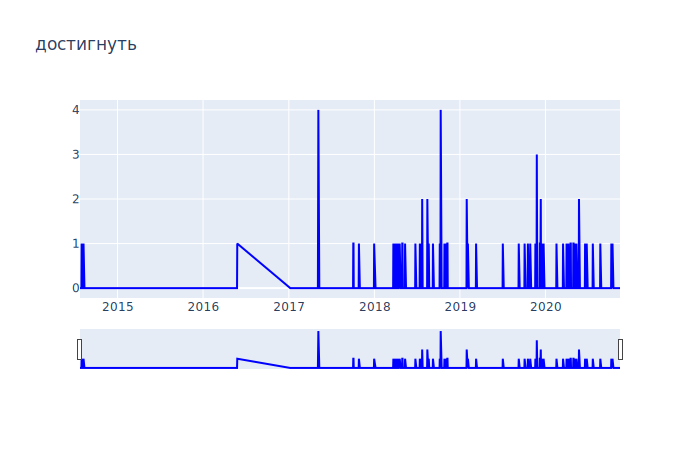

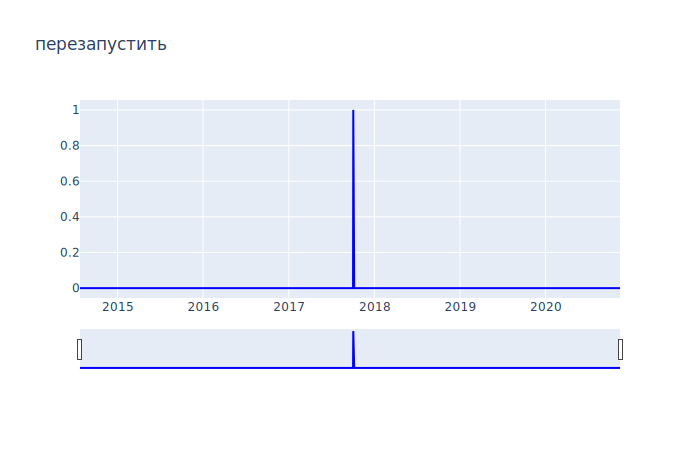

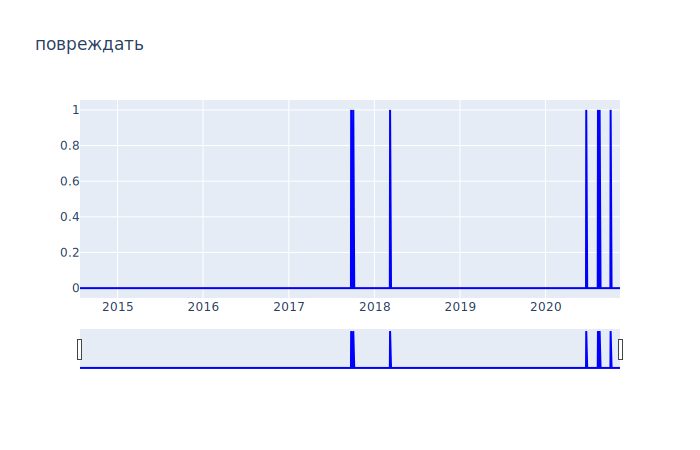

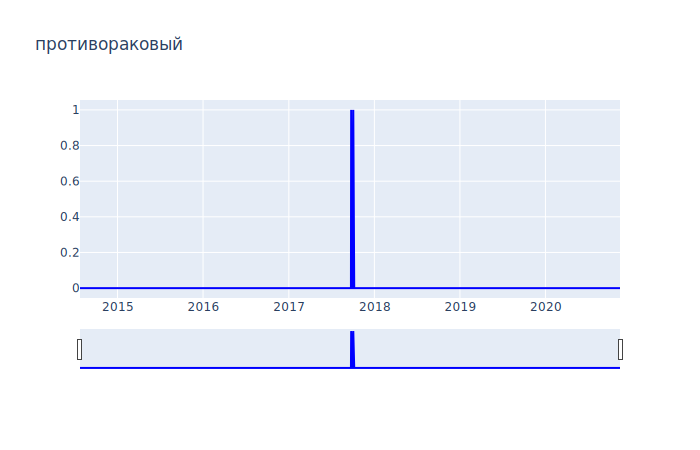

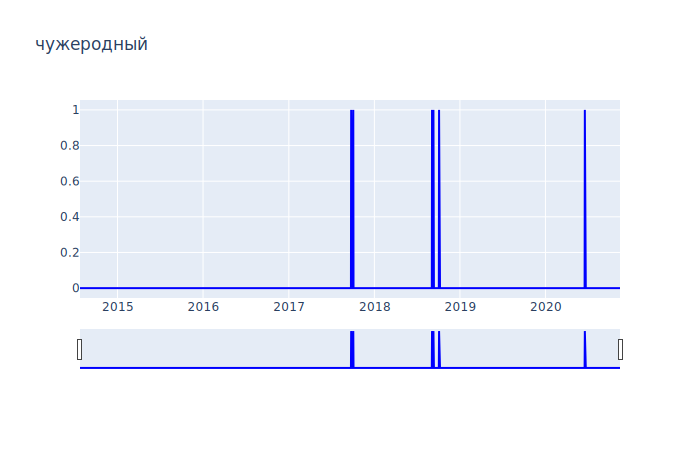

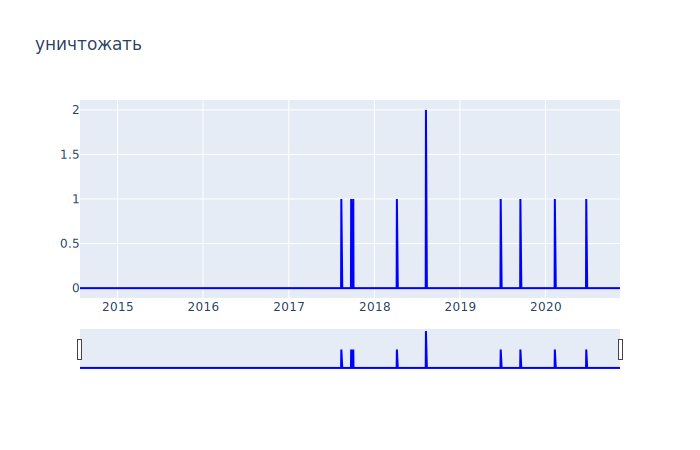

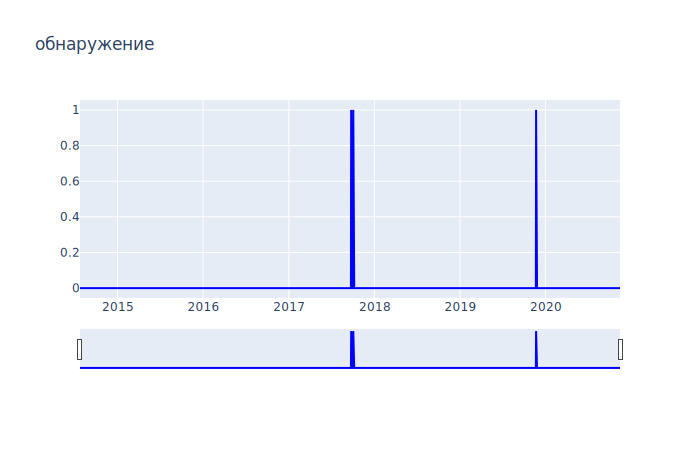

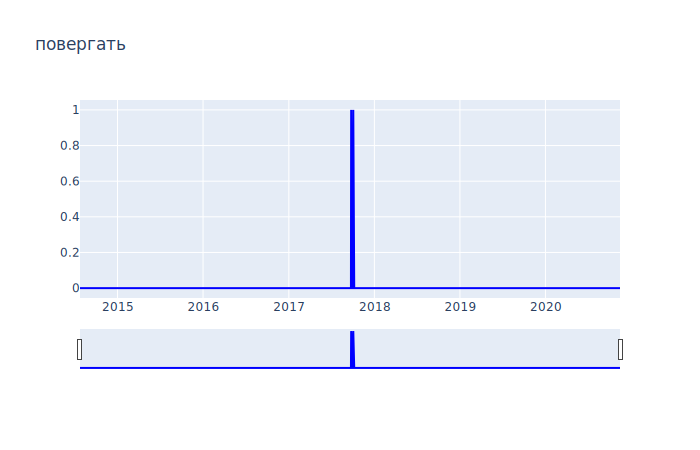

In [69]:
plot_separate_line(df_post, counter_like, 10, 1, 'svg')

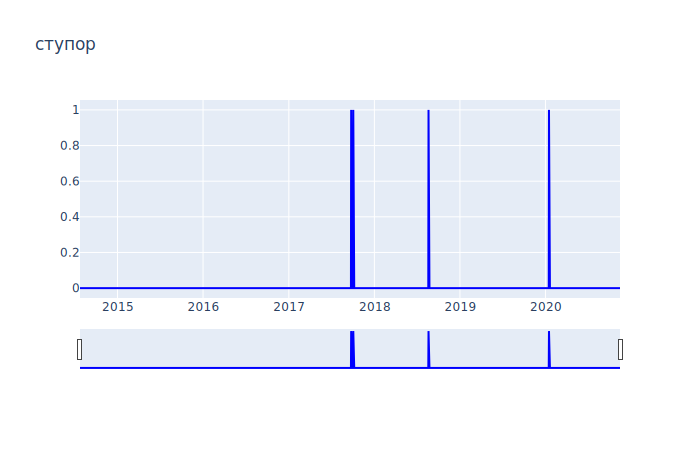

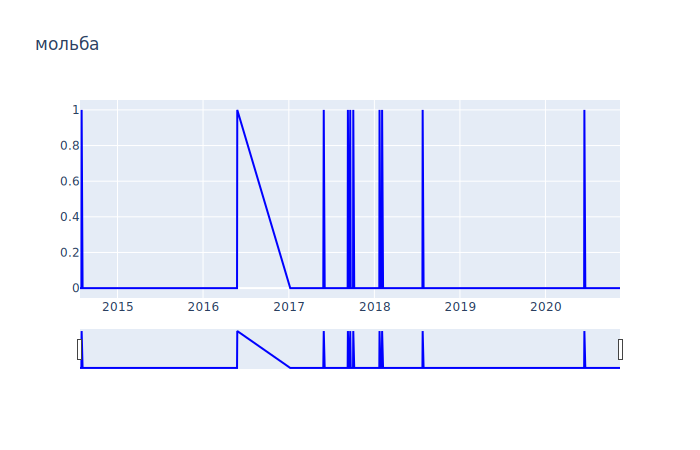

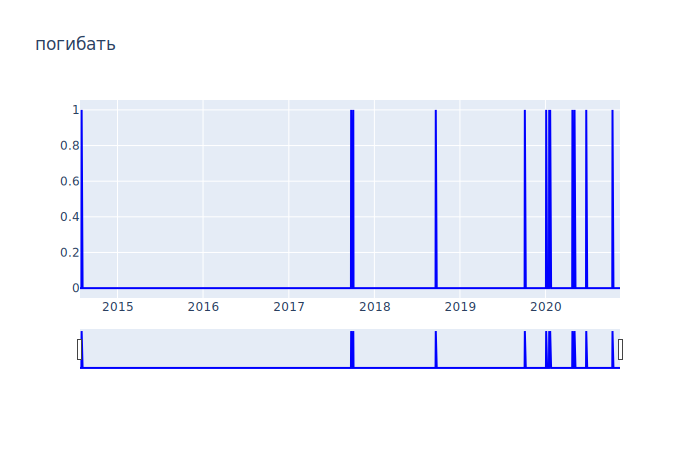

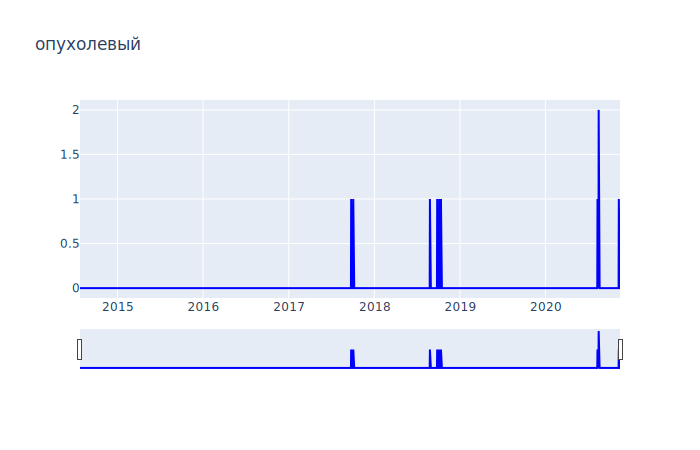

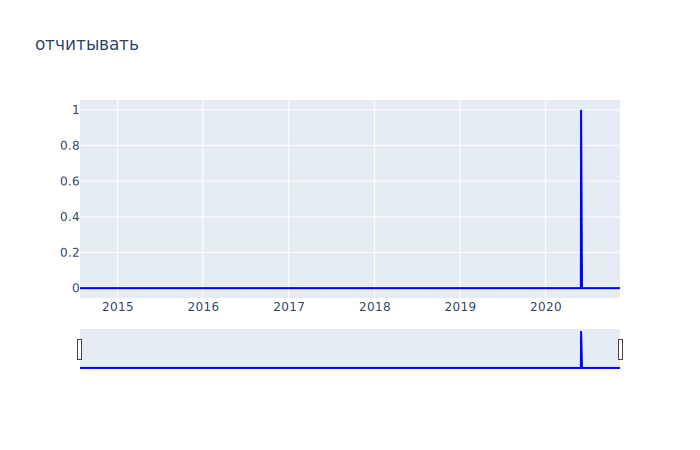

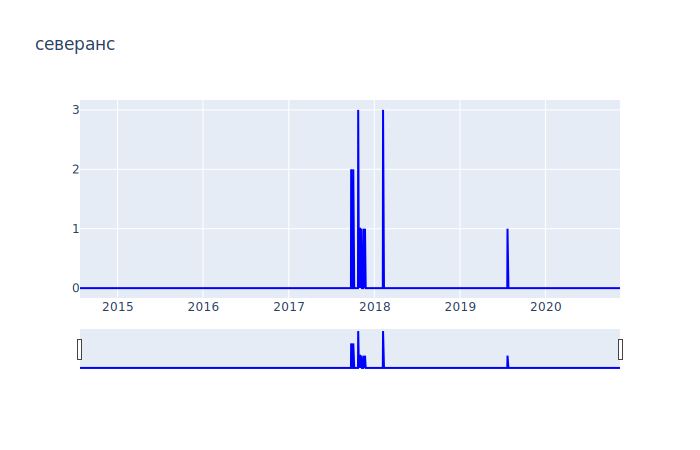

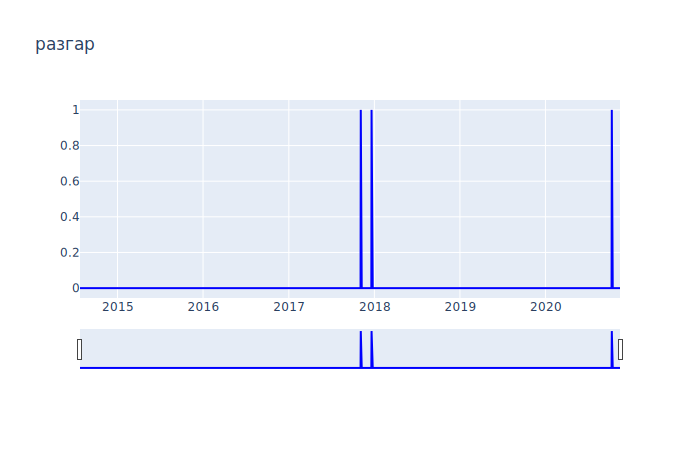

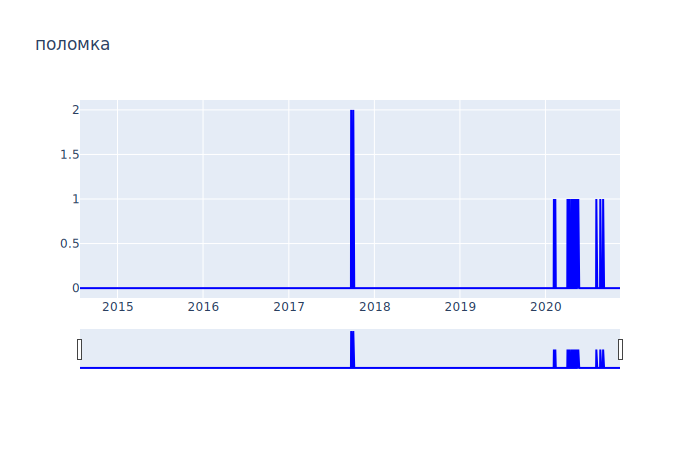

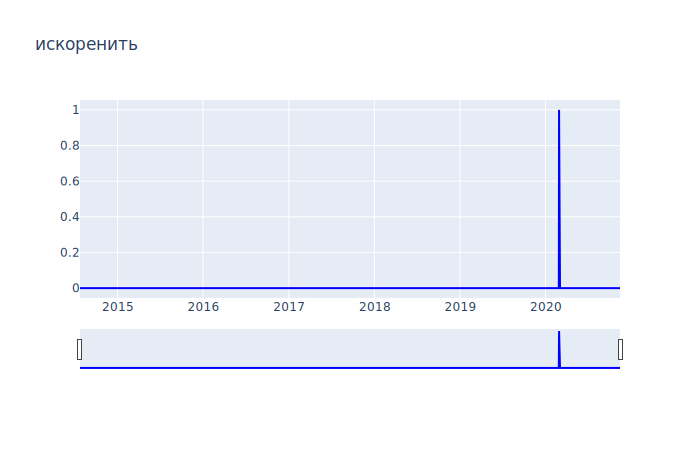

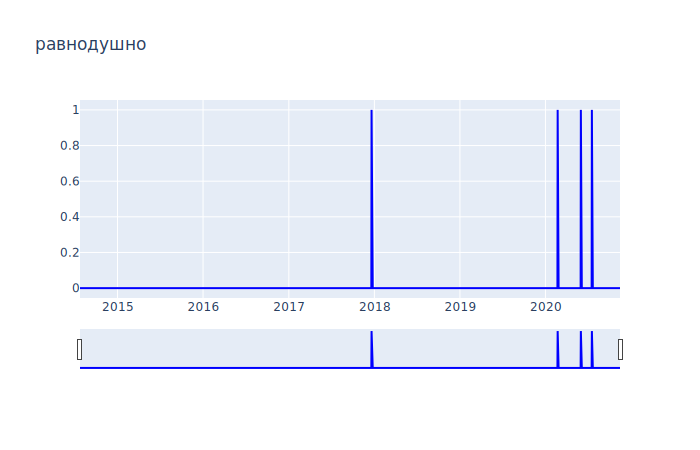

In [70]:
plot_separate_line(df_post, count_top_log_coef, 10, 1, 'svg')

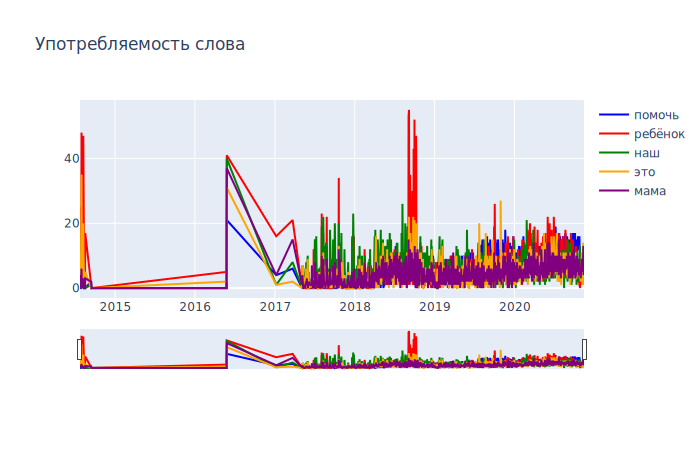

In [71]:
plot_5_lines(df_post, full_counter, 10, 0, 1, 'svg')

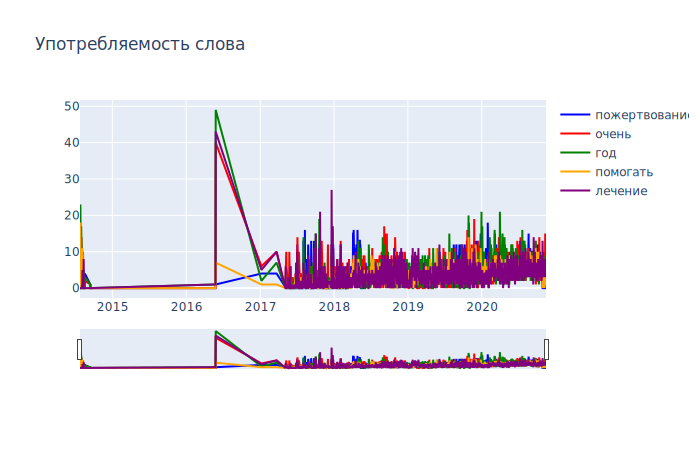

In [72]:
plot_5_lines(df_post, full_counter, 10, 1, 1, 'svg')

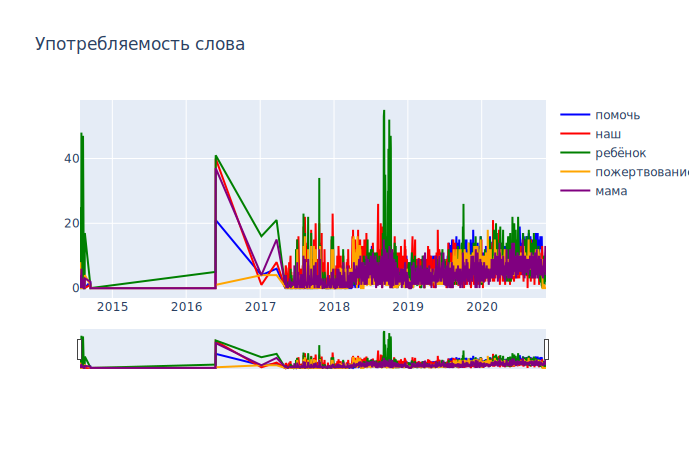

In [73]:
plot_5_lines(df_post, like_counter, 10, 0, 1, 'svg')

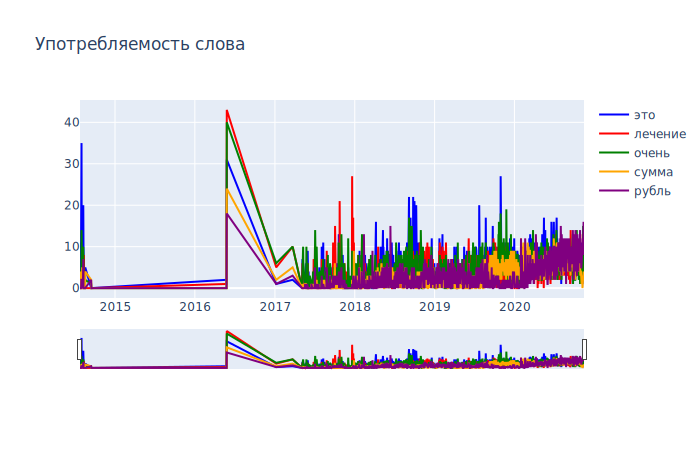

In [74]:
plot_5_lines(df_post, like_counter, 10, 1, 1, 'svg')

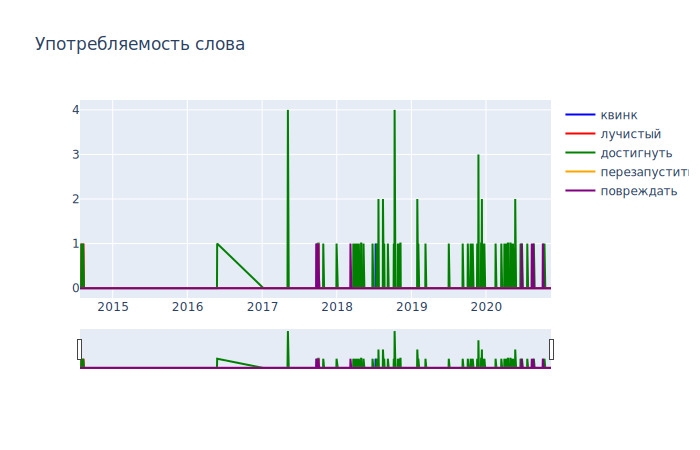

In [75]:
plot_5_lines(df_post, counter_like, 10, 0, 1, 'svg')

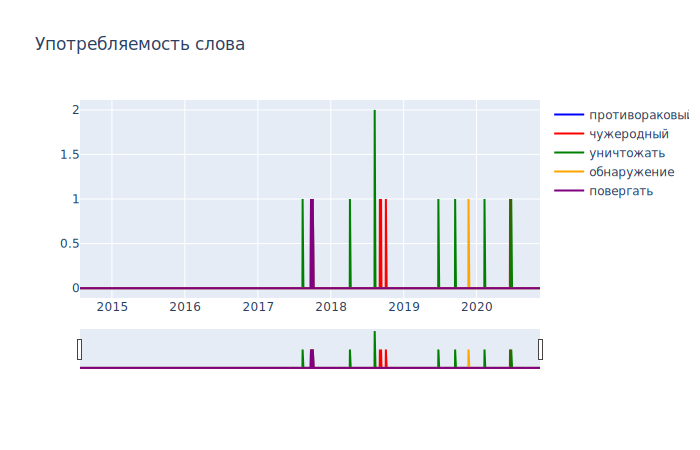

In [76]:
plot_5_lines(df_post, counter_like, 10, 1, 1, 'svg')

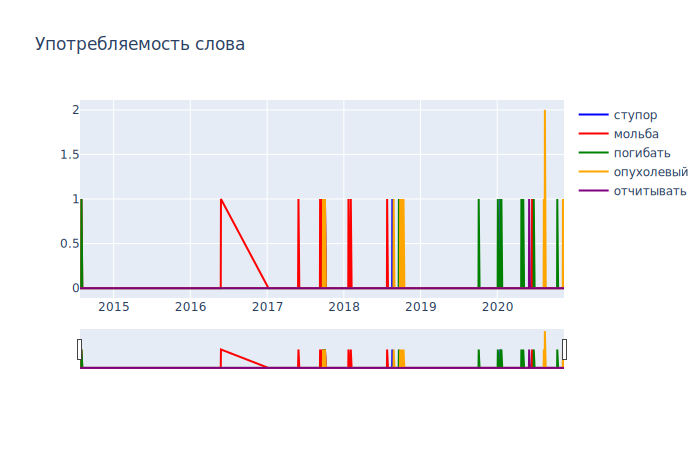

In [77]:
plot_5_lines(df_post, count_top_log_coef, 10, 0, 1, 'svg')

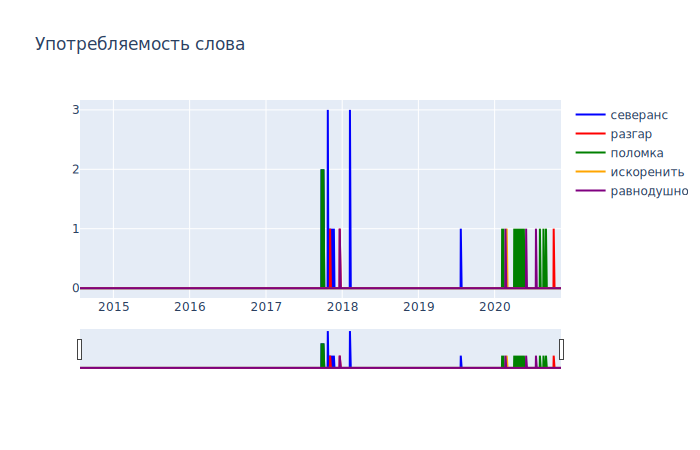

In [78]:
plot_5_lines(df_post, count_top_log_coef, 10, 1, 1, 'svg')